#                                                         # GPS_Navigation_System

## Loading and extracting a zip folder of device Location Data for 10 GPS devices and merging into a dataframe

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import zipfile
import numpy as np
# Paths
zip_file_path = 'gps_data.zip'  # Adjust this to your local zip file name
extract_folder = 'extracted_csv_files'

# Extract the zip file
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List all extracted CSV files
csv_files = [os.path.join(extract_folder, f) for f in os.listdir(extract_folder) if f.endswith('.csv')]

# Initialize an empty DataFrame to hold merged data
merged_data = pd.DataFrame()

# Merge all CSV files
for file_path in csv_files:
    data = pd.read_csv(file_path)
    merged_data = pd.concat([merged_data, data], ignore_index=True)

# Save the merged data to a new CSV
merged_data.to_csv('merged_gps_data.csv', index=False)
print("Merging complete. Merged data saved as 'merged_gps_data.csv'.")

Merging complete. Merged data saved as 'merged_gps_data.csv'.


## Load and Inspect the Structure of GPS Data

In [3]:
import pandas as pd

In [4]:
# Load the CSV file to check its structure and data

gps_data = pd.read_csv("merged_gps_data.csv")

# Display the first few rows of the dataset
gps_data.head(), gps_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403557 entries, 0 to 403556
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date_time  403557 non-null  object 
 1   latitude   403557 non-null  float64
 2   longitude  403557 non-null  float64
 3   accuracy   403557 non-null  float64
 4   geohash    403557 non-null  object 
 5   geohash_9  403557 non-null  object 
dtypes: float64(3), object(3)
memory usage: 18.5+ MB


(             date_time   latitude  longitude  accuracy       geohash  \
 0  2023-07-09 06:24:18  28.630590  77.029114       9.0  ttnfbu4ck2g3   
 1  2023-07-09 06:24:46  28.630520  77.029152      10.0  ttnfbu4bv7c0   
 2  2023-07-09 06:24:47  28.630569  77.029182      12.0  ttnfbu4cjvpd   
 3  2023-07-09 06:25:50  28.630369  77.029167      20.0  ttnfbgfzvzb1   
 4  2023-07-09 06:25:51  28.630541  77.029160      14.0  ttnfbu4bvx2x   
 
    geohash_9  
 0  ttnfbu4ck  
 1  ttnfbu4bv  
 2  ttnfbu4cj  
 3  ttnfbgfzv  
 4  ttnfbu4bv  ,
 None)

## Data Preprocessing

In [5]:
# Step 1: Data Preprocessing

# Convert 'date_time' to datetime format
gps_data['date_time'] = pd.to_datetime(gps_data['date_time'])

# Sort the data by 'date_time' to ensure temporal order
gps_data = gps_data.sort_values(by='date_time')

# Check for missing or null values in the dataset
missing_values = gps_data.isnull().sum()

# Describe the data for outlier detection
data_description = gps_data.describe()

gps_data.head(), missing_values, data_description


(                 date_time   latitude  longitude  accuracy       geohash  \
 377467 2023-01-01 03:40:35  28.551929  77.349480    9.0000  ttp42jspj988   
 377468 2023-01-01 03:40:40  28.551941  77.349472    9.0000  ttp42jspj73h   
 377469 2023-01-01 03:40:48  28.551889  77.349510    9.0000  ttp42jsny4nf   
 377470 2023-01-01 03:41:03  28.551920  77.349472    9.7916  ttp42jsnvr9h   
 377471 2023-01-01 03:41:03  28.551910  77.349487    8.7916  ttp42jsnvtvp   
 
         geohash_9  
 377467  ttp42jspj  
 377468  ttp42jspj  
 377469  ttp42jsny  
 377470  ttp42jsnv  
 377471  ttp42jsnv  ,
 date_time    0
 latitude     0
 longitude    0
 accuracy     0
 geohash      0
 geohash_9    0
 dtype: int64,
                            date_time       latitude      longitude  \
 count                         403557  403557.000000  403557.000000   
 mean   2023-07-11 12:24:56.642816256      28.604259      77.083881   
 min              2023-01-01 03:40:35      28.337009      76.919319   
 25%          

## Visualizing Raw GPS Location Data

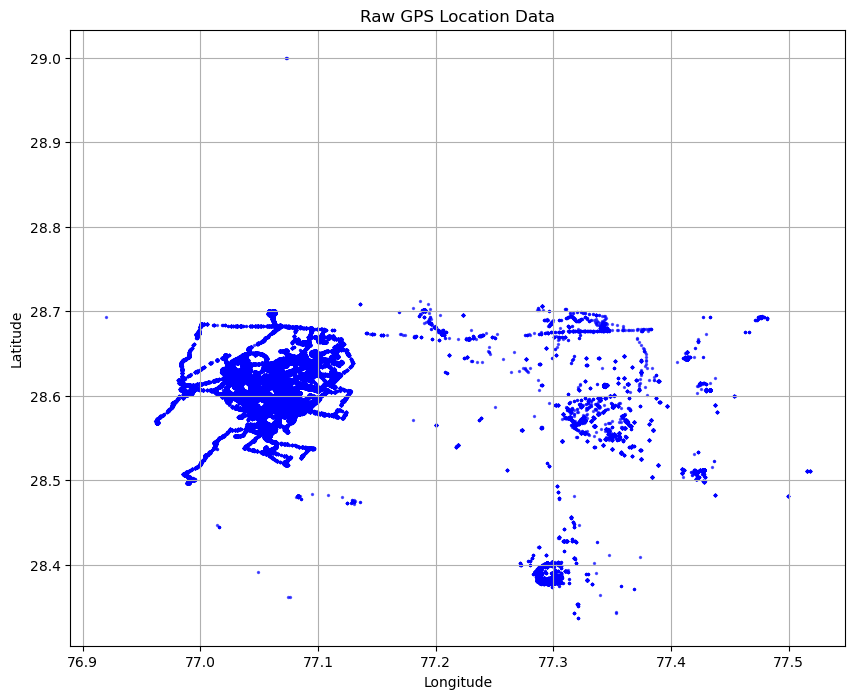

In [6]:
import matplotlib.pyplot as plt

# Sample a subset of data (optional)
sampled_data = gps_data.sample(400000, random_state=42)

# Plot the raw GPS location data
plt.figure(figsize=(10, 8))
plt.scatter(sampled_data['longitude'], sampled_data['latitude'], c='blue', s=2, alpha=0.6)
plt.title('Raw GPS Location Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Sample gps_data DataFrame (replace this with actual loading from your dataset)
# gps_data = pd.read_csv("your_gps_data.csv")




## Trip and Dwell Detection with Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_4548\1215155665.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gps_data['latitude'] = gps_data['latitude'].fillna(method='ffill')
C:\Users\HP\AppData\Local\Temp\ipykernel_4548\1215155665.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gps_data['longitude'] = gps_data['longitude'].fillna(method='ffill')
C:\Users\HP\AppData\Local\Temp\ipykernel_4548\1215155665.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gps_data['date_time'] = gps_data['date_time'].fillna(method='ffill')


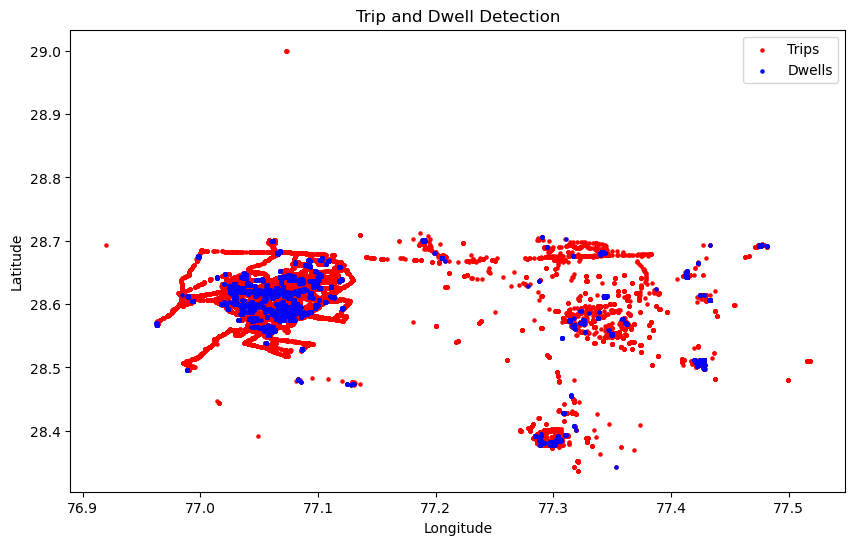

Missing Values:
 date_time             0
latitude              0
longitude             0
accuracy              0
geohash               0
geohash_9             0
distance              0
time_diff             0
velocity              0
is_trip               0
is_dwell_candidate    0
dwell_duration        0
is_dwell              0
final_trip            0
dtype: int64
Data Description:
                            date_time       latitude      longitude  \
count                         104763  104763.000000  104763.000000   
mean   2023-06-17 18:11:08.400074496      28.603512      77.137195   
min              2023-01-01 03:40:40      28.337009      76.919319   
25%              2023-07-11 16:10:11      28.587299      77.048767   
50%              2023-07-17 14:17:34      28.605900      77.068832   
75%              2023-07-23 13:41:16      28.629400      77.116001   
max              2023-07-31 22:29:24      28.999989      77.518150   
std                              NaN       0.058961    

In [8]:
import pandas as pd
import numpy as np
from haversine import haversine, Unit
import matplotlib.pyplot as plt

# Thresholds
DISTANCE_THRESHOLD = 80  # meters
VELOCITY_THRESHOLD = 5  # meters/second (18 km/h)
DWELL_TIME_THRESHOLD = 3 * 60  # 3 minutes in seconds
MAX_VELOCITY = 27.78  # Maximum velocity cap in meters/second (100 km/h)

# Convert 'date_time' to datetime format
gps_data['date_time'] = pd.to_datetime(gps_data['date_time'])
gps_data = gps_data.sort_values(by='date_time')

# Forward fill for missing values in latitude, longitude, and timestamp
gps_data['latitude'] = gps_data['latitude'].fillna(method='ffill')
gps_data['longitude'] = gps_data['longitude'].fillna(method='ffill')
gps_data['date_time'] = gps_data['date_time'].fillna(method='ffill')

# Add previous latitude, longitude, and timestamp
gps_data['prev_latitude'] = gps_data['latitude'].shift(1)
gps_data['prev_longitude'] = gps_data['longitude'].shift(1)
gps_data['prev_date_time'] = gps_data['date_time'].shift(1)

# Calculate distance using Haversine formula
gps_data['distance'] = gps_data.apply(
    lambda row: haversine(
        (row['prev_latitude'], row['prev_longitude']),
        (row['latitude'], row['longitude']),
        unit=Unit.METERS
    ) if not pd.isna(row['prev_latitude']) else 0,
    axis=1
)

# Calculate time difference in seconds
gps_data['time_diff'] = (gps_data['date_time'] - gps_data['prev_date_time']).dt.total_seconds()

# Filter out very small time differences that could cause large velocities (e.g., less than 1 second)
gps_data = gps_data[gps_data['time_diff'] > 1]

# Calculate velocity
gps_data['velocity'] = gps_data['distance'] / gps_data['time_diff']
gps_data['velocity'] = gps_data['velocity'].replace([np.inf, -np.inf], 0)  # Replace infinite velocities with 0
gps_data['velocity'] = gps_data['velocity'].fillna(0)  # Replace NaN velocities with 0

# Cap the velocity at the maximum value (100 km/h or 27.78 m/s)
gps_data['velocity'] = np.where(gps_data['velocity'] > MAX_VELOCITY, MAX_VELOCITY, gps_data['velocity'])

# Trip detection
gps_data['is_trip'] = gps_data['velocity'] > VELOCITY_THRESHOLD

# Identify dwell candidates
gps_data['is_dwell_candidate'] = gps_data['distance'] < DISTANCE_THRESHOLD

# Group consecutive dwell candidates and calculate dwell duration
gps_data['dwell_group'] = (gps_data['is_dwell_candidate'] != gps_data['is_dwell_candidate'].shift()).cumsum()
gps_data['dwell_duration'] = gps_data.groupby('dwell_group')['time_diff'].transform('sum')

# Final dwell and trip classification
gps_data['is_dwell'] = gps_data['is_dwell_candidate'] & (gps_data['dwell_duration'] >= DWELL_TIME_THRESHOLD)
gps_data['final_trip'] = ~gps_data['is_dwell']

# Drop unnecessary columns
gps_data = gps_data.drop(columns=['prev_latitude', 'prev_longitude', 'prev_date_time', 'dwell_group'])

# Plot visualization
plt.figure(figsize=(10, 6))
plt.scatter(
    gps_data[gps_data['final_trip']]['longitude'], 
    gps_data[gps_data['final_trip']]['latitude'], 
    c='red', label='Trips', s=5
)
plt.scatter(
    gps_data[gps_data['is_dwell']]['longitude'], 
    gps_data[gps_data['is_dwell']]['latitude'], 
    c='blue', label='Dwells', s=5
)
plt.title('Trip and Dwell Detection')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Check for missing values
missing_values = gps_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Data description
data_description = gps_data.describe()
print("Data Description:\n", data_description)


## GPS Data Summary and Insights


In [9]:
# Calculate number of trips and dwells
num_trips = gps_data['final_trip'].sum()
num_dwells = gps_data['is_dwell'].sum()

# Average dwell duration
average_dwell_duration = gps_data.loc[gps_data['is_dwell'], 'dwell_duration'].mean()

# Total distance traveled during trips
total_trip_distance = gps_data.loc[gps_data['final_trip'], 'distance'].sum()

# Average velocity during trips
average_trip_velocity = gps_data.loc[gps_data['final_trip'], 'velocity'].mean()

# Summary statistics
print(f"Number of Trips: {num_trips}")
print(f"Number of Dwells: {num_dwells}")
print(f"Average Dwell Duration: {average_dwell_duration:.2f} seconds")
print(f"Total Trip Distance: {total_trip_distance:.2f} meters")
print(f"Average Trip Velocity: {average_trip_velocity:.2f} meters/second")

# Identify longest dwell and longest trip
longest_dwell_duration = gps_data.loc[gps_data['is_dwell'], 'dwell_duration'].max()
longest_trip_distance = gps_data.loc[gps_data['final_trip'], 'distance'].sum()

print(f"Longest Dwell Duration: {longest_dwell_duration:.2f} seconds")
print(f"Longest Trip Distance: {longest_trip_distance:.2f} meters")


Number of Trips: 68235
Number of Dwells: 36528
Average Dwell Duration: 3534.79 seconds
Total Trip Distance: 164452067.32 meters
Average Trip Velocity: 12.91 meters/second
Longest Dwell Duration: 47006.00 seconds
Longest Trip Distance: 164452067.32 meters


In [10]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104763 entries, 377468 to 370565
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_time           104763 non-null  datetime64[ns]
 1   latitude            104763 non-null  float64       
 2   longitude           104763 non-null  float64       
 3   accuracy            104763 non-null  float64       
 4   geohash             104763 non-null  object        
 5   geohash_9           104763 non-null  object        
 6   distance            104763 non-null  float64       
 7   time_diff           104763 non-null  float64       
 8   velocity            104763 non-null  float64       
 9   is_trip             104763 non-null  bool          
 10  is_dwell_candidate  104763 non-null  bool          
 11  dwell_duration      104763 non-null  float64       
 12  is_dwell            104763 non-null  bool          
 13  final_trip          104763 no

In [11]:
gps_data.head()


,date_time,latitude,longitude,accuracy,geohash,geohash_9,distance,time_diff,velocity,is_trip,is_dwell_candidate,dwell_duration,is_dwell,final_trip
377468,2023-01-01 03:40:40,28.551941,77.349472,9.0000,ttp42jspj73h,ttp42jspj,1.474658,5.0,0.294932,False,True,105.0,False,True
377469,2023-01-01 03:40:48,28.551889,77.349510,9.0000,ttp42jsny4nf,ttp42jsny,6.831807,8.0,0.853976,False,True,105.0,False,True
377470,2023-01-01 03:41:03,28.551920,77.349472,9.7916,ttp42jsnvr9h,ttp42jsnv,5.039590,15.0,0.335973,False,True,105.0,False,True
377472,2023-01-01 03:41:16,28.551950,77.349518,9.0000,ttp42jspnmnr,ttp42jspn,5.359232,13.0,0.412249,False,True,105.0,False,True
377473,2023-01-01 03:41:24,28.551889,77.349487,9.0000,ttp42jsnvf04,ttp42jsnv,7.412519,8.0,0.926565,False,True,105.0,False,True


## Overlay with Google Open Buildings Dataset

In [12]:
import pandas as pd

# Define constants
FILE_PATH = '391_buildings.csv.gz'  # Path to the compressed file (NEW DELHI & SURROUNDING REGION GOOGLE OPEN BUILDING DATASET)
OUTPUT_FILE = 'filtered_buildings.csv'  # Path to save the filtered data (OPEN BUILDINGS DATA OF OUR REGION)
CHUNK_SIZE = 1000000  # Number of rows per chunk
LAT_MIN, LAT_MAX = 28.3, 28.8  # Latitude range of interest
LON_MIN, LON_MAX = 76.9, 77.5  # Longitude range of interest

# Process the dataset in chunks and save filtered data directly to disk
try:
    with open(OUTPUT_FILE, 'w') as output_file:
        for i, chunk in enumerate(pd.read_csv(FILE_PATH, compression='gzip', chunksize=CHUNK_SIZE)):
            # Filter the chunk for the area of interest
            filtered_chunk = chunk[
                (chunk['latitude'] >= LAT_MIN) & 
                (chunk['latitude'] <= LAT_MAX) &
                (chunk['longitude'] >= LON_MIN) & 
                (chunk['longitude'] <= LON_MAX)
            ]

            # Append filtered data to the output file
            filtered_chunk.to_csv(output_file, mode='a', header=i == 0, index=False)
            print(f"Chunk {i+1}: Processed {len(chunk)} rows, Filtered {len(filtered_chunk)} rows")
    
    print(f"Filtering complete. Data saved to '{OUTPUT_FILE}'.")

except Exception as e:
    print(f"An error occurred: {e}")


Chunk 1: Processed 1000000 rows, Filtered 61530 rows
Chunk 2: Processed 1000000 rows, Filtered 61516 rows
Chunk 3: Processed 1000000 rows, Filtered 61807 rows
Chunk 4: Processed 1000000 rows, Filtered 61669 rows
Chunk 5: Processed 1000000 rows, Filtered 61375 rows
Chunk 6: Processed 1000000 rows, Filtered 61751 rows
Chunk 7: Processed 1000000 rows, Filtered 61689 rows
Chunk 8: Processed 1000000 rows, Filtered 61651 rows
Chunk 9: Processed 1000000 rows, Filtered 61335 rows
Chunk 10: Processed 1000000 rows, Filtered 61618 rows
Chunk 11: Processed 1000000 rows, Filtered 61913 rows
Chunk 12: Processed 1000000 rows, Filtered 61680 rows
Chunk 13: Processed 1000000 rows, Filtered 61623 rows
Chunk 14: Processed 1000000 rows, Filtered 61574 rows
Chunk 15: Processed 1000000 rows, Filtered 61687 rows
Chunk 16: Processed 1000000 rows, Filtered 61687 rows
Chunk 17: Processed 1000000 rows, Filtered 61859 rows
Chunk 18: Processed 1000000 rows, Filtered 61702 rows
Chunk 19: Processed 1000000 rows, Fil

##  Counting Rows in Filtered Building Dataset

In [13]:
import pandas as pd

# Path to the filtered file
OUTPUT_FILE = 'filtered_buildings.csv'

# Read the filtered data and count the number of rows
filtered_data = pd.read_csv(OUTPUT_FILE)

# Print the number of rows in the filtered data
print(f"Number of rows in the filtered file: {len(filtered_data)}")


Number of rows in the filtered file: 4523777


## Spatial Join Between GPS Data and Google Open Buildings Dataset

In [14]:
import pandas as pd
import geopandas as gpd

# Step 1: Load GPS Data as a GeoDataFrame
# Load your merged GPS data
gps_data = pd.read_csv("merged_gps_data.csv")  # Load your GPS data (replace with the correct file path)
gps_gdf = gpd.GeoDataFrame(
    gps_data,
    geometry=gpd.points_from_xy(gps_data['longitude'], gps_data['latitude']),
    crs="EPSG:4326"  # WGS84 coordinate reference system (geographic)
)

# Step 2: Load Google Open Buildings Dataset
# Assuming filtered_buildings is already a GeoDataFrame from previous steps
filtered_buildings = pd.read_csv('filtered_buildings.csv')  # Load the filtered buildings data (replace with the correct file path)
filtered_buildings_gdf = gpd.GeoDataFrame(
    filtered_buildings,
    geometry=gpd.points_from_xy(filtered_buildings['longitude'], filtered_buildings['latitude']),
    crs="EPSG:4326"  # WGS84 coordinate reference system (geographic)
)

# Step 3: Perform Spatial Join
# Reproject the GPS data and buildings data to a projected CRS (e.g., UTM Zone 43N for New Delhi)
gps_gdf = gps_gdf.to_crs(epsg=32643)  # UTM Zone 43N (projected CRS)
filtered_buildings_gdf = filtered_buildings_gdf.to_crs(epsg=32643)  # UTM Zone 43N (projected CRS)

# Perform the spatial join
overlay_result = gpd.sjoin_nearest(
    gps_gdf,
    filtered_buildings_gdf,
    how="inner",  # "inner" keeps only the GPS points that are within the specified distance
    max_distance=50,  # Distance in meters (you can adjust this value as needed)
    distance_col="distance_to_building"  # New column that stores distance to the nearest building
)

# Step 4: Inspect and Save Results
# Check the first few rows of the result to validate the overlay
print(overlay_result.head())

# Save the overlay result to a CSV file
overlay_result.to_csv('gps_building_overlay_result.csv', index=False)

# Display message upon completion
print("Overlay Complete. Results saved to 'gps_building_overlay_result.csv'.")


             date_time  latitude_left  longitude_left  accuracy       geohash  \
0  2023-07-09 06:24:18      28.630590       77.029114       9.0  ttnfbu4ck2g3   
1  2023-07-09 06:24:46      28.630520       77.029152      10.0  ttnfbu4bv7c0   
2  2023-07-09 06:24:47      28.630569       77.029182      12.0  ttnfbu4cjvpd   
3  2023-07-09 06:25:50      28.630369       77.029167      20.0  ttnfbgfzvzb1   
4  2023-07-09 06:25:51      28.630541       77.029160      14.0  ttnfbu4bvx2x   

   geohash_9                        geometry  index_right  latitude_right  \
0  ttnfbu4ck  POINT (698356.719 3168742.768)      3187047       28.630620   
1  ttnfbu4bv   POINT (698360.582 3168735.01)      4018416       28.630451   
2  ttnfbu4cj  POINT (698363.473 3168740.556)      3187047       28.630620   
3  ttnfbgfzv  POINT (698362.357 3168718.336)      1100452       28.630363   
4  ttnfbu4bv  POINT (698361.289 3168737.348)      3187047       28.630620   

   longitude_right  area_in_meters  confidence ful

##  Plotting GPS Points and Nearest Buildings

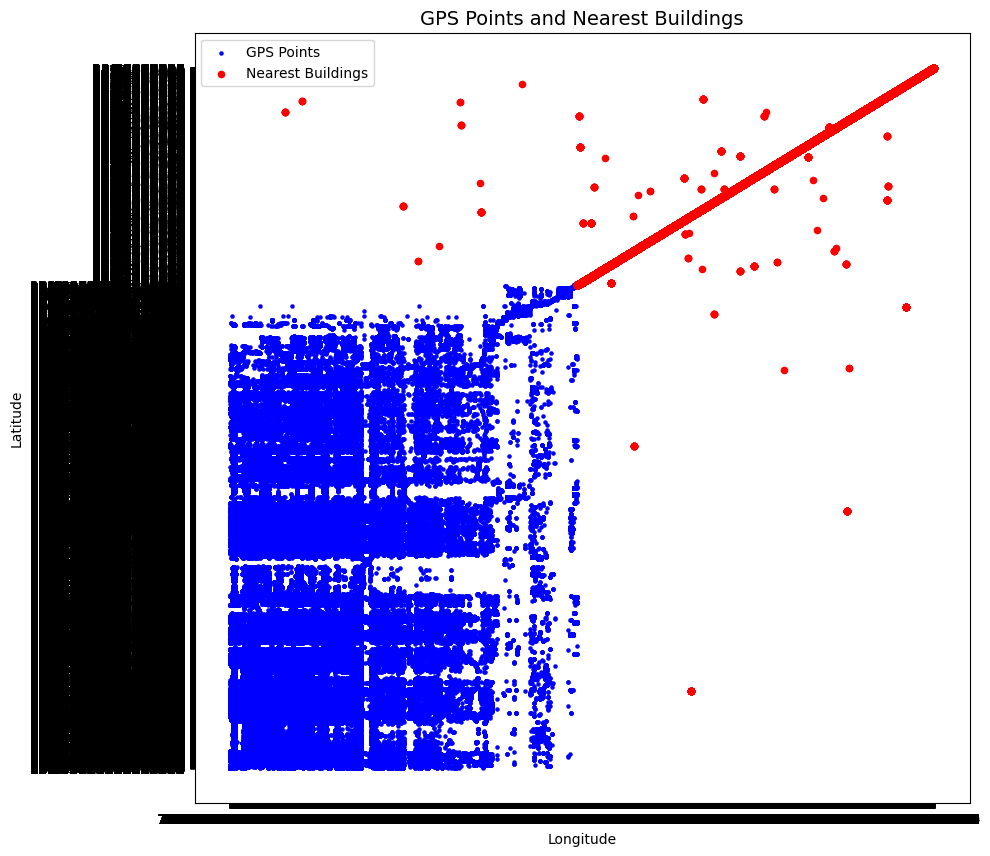

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the overlay result (GeoDataFrame)
overlay_result = gpd.read_file('gps_building_overlay_result.csv')

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GPS points using latitude_left and longitude_left columns
ax.scatter(
    overlay_result['longitude_left'], 
    overlay_result['latitude_left'], 
    color='blue', s=5, label='GPS Points'
)

# Plot the nearest buildings using latitude_right and longitude_right columns
ax.scatter(
    overlay_result['longitude_right'], 
    overlay_result['latitude_right'], 
    color='red', s=20, label='Nearest Buildings'
)

# Customize plot
ax.set_title("GPS Points and Nearest Buildings", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

# Show the plot
plt.show()


In [17]:
import pandas as pd

# Convert latitude and longitude to numeric
overlay_result['latitude_left'] = pd.to_numeric(overlay_result['latitude_left'], errors='coerce')
overlay_result['longitude_left'] = pd.to_numeric(overlay_result['longitude_left'], errors='coerce')

# Check for any non-numeric values that were converted to NaN
print(overlay_result[['latitude_left', 'longitude_left']].info())

# Drop rows with invalid latitude/longitude if needed
overlay_result = overlay_result.dropna(subset=['latitude_left', 'longitude_left'])

# Confirm the conversion
print(overlay_result[['latitude_left', 'longitude_left']].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376622 entries, 0 to 376621
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude_left   376622 non-null  float64
 1   longitude_left  376622 non-null  float64
dtypes: float64(2)
memory usage: 5.7 MB
None
   latitude_left  longitude_left
0      28.630590       77.029114
1      28.630520       77.029152
2      28.630569       77.029182
3      28.630369       77.029167
4      28.630541       77.029160


##  Distance to Building Data Analysis

In [19]:
# Step 1: Check if 'distance_to_building' contains any non-numeric values
print(overlay_result['distance_to_building'].dtype)  # Check data type of the column
print(overlay_result['distance_to_building'].head())  # Preview the first few values

# Step 2: Convert the column to numeric (if needed), and handle errors gracefully
overlay_result['distance_to_building'] = pd.to_numeric(
    overlay_result['distance_to_building'], errors='coerce'  # 'coerce' will set invalid values to NaN
)

# Step 3: Check for NaN values
print(overlay_result['distance_to_building'].isna().sum())  # Count NaN values in the column

# Step 4: Handle missing values (e.g., fill NaN with a default value, or drop rows with NaN)
overlay_result = overlay_result.dropna(subset=['distance_to_building'])

# Step 5: Now calculate basic statistics
average_distance = overlay_result['distance_to_building'].mean()
max_distance = overlay_result['distance_to_building'].max()
min_distance = overlay_result['distance_to_building'].min()

# Print the results
print("Average Distance to Building:", average_distance)
print("Max Distance to Building:", max_distance)
print("Min Distance to Building:", min_distance)


object
0    3.5678266297819357
1     9.173463235157481
2     9.877946752354028
3    7.3818547534133305
4     10.56867698624092
Name: distance_to_building, dtype: object
0
Average Distance to Building: 15.446401986692964
Max Distance to Building: 49.99984710498842
Min Distance to Building: 0.0191413044841563


## Trip Detection and Start/End Locations Extraction

In [20]:
import pandas as pd
import numpy as np
from haversine import haversine, Unit

# Load your GPS data (assuming you've already preprocessed it)
gps_data = pd.read_csv("merged_gps_data.csv")

# Convert 'date_time' to datetime format and sort by timestamp
gps_data['date_time'] = pd.to_datetime(gps_data['date_time'])
gps_data = gps_data.sort_values(by='date_time')

# Calculate distance and time difference between consecutive GPS points
gps_data['prev_latitude'] = gps_data['latitude'].shift(1)
gps_data['prev_longitude'] = gps_data['longitude'].shift(1)
gps_data['time_diff'] = (gps_data['date_time'] - gps_data['date_time'].shift(1)).dt.total_seconds()

# Calculate distance using Haversine formula
gps_data['distance'] = gps_data.apply(
    lambda row: haversine(
        (row['prev_latitude'], row['prev_longitude']),
        (row['latitude'], row['longitude']),
        unit=Unit.METERS
    ) if not pd.isna(row['prev_latitude']) else 0,
    axis=1
)

# Calculate velocity (distance/time)
gps_data['velocity'] = gps_data['distance'] / gps_data['time_diff']
gps_data['velocity'] = gps_data['velocity'].fillna(0)

# Define a velocity threshold to identify trips (e.g., 5 m/s)
VELOCITY_THRESHOLD = 5  # 5 meters/second
gps_data['is_trip'] = gps_data['velocity'] > VELOCITY_THRESHOLD

# Identify start and end locations for trips (first and last points in a trip)
gps_data['trip_id'] = (gps_data['is_trip'] != gps_data['is_trip'].shift()).cumsum()
trip_start_end = gps_data.groupby('trip_id').agg(
    trip_start=('date_time', 'first'),
    trip_end=('date_time', 'last'),
    trip_start_location=('latitude', 'first'),
    trip_end_location=('latitude', 'last')
).reset_index()

# Display trip start and end locations
print(trip_start_end.head())


   trip_id          trip_start            trip_end  trip_start_location  \
0        1 2023-01-01 03:40:35 2023-01-01 03:41:03            28.551929   
1        2 2023-01-01 03:41:03 2023-01-01 03:41:03            28.551910   
2        3 2023-01-01 03:41:16 2023-01-01 03:41:30            28.551950   
3        4 2023-01-01 03:41:32 2023-01-01 03:41:32            28.551870   
4        5 2023-01-01 03:41:45 2023-01-01 03:42:20            28.551889   

   trip_end_location  
0           28.55192  
1           28.55191  
2           28.55197  
3           28.55187  
4           28.55188  


In [21]:
gps_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 403557 entries, 377467 to 370566
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date_time       403557 non-null  datetime64[ns]
 1   latitude        403557 non-null  float64       
 2   longitude       403557 non-null  float64       
 3   accuracy        403557 non-null  float64       
 4   geohash         403557 non-null  object        
 5   geohash_9       403557 non-null  object        
 6   prev_latitude   403556 non-null  float64       
 7   prev_longitude  403556 non-null  float64       
 8   time_diff       403556 non-null  float64       
 9   distance        403557 non-null  float64       
 10  velocity        403557 non-null  float64       
 11  is_trip         403557 non-null  bool          
 12  trip_id         403557 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(8), int32(1), object(2)
memory usage: 38.9+ MB


## GPS Data Analysis: Summary Statistics and Visualizations

C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


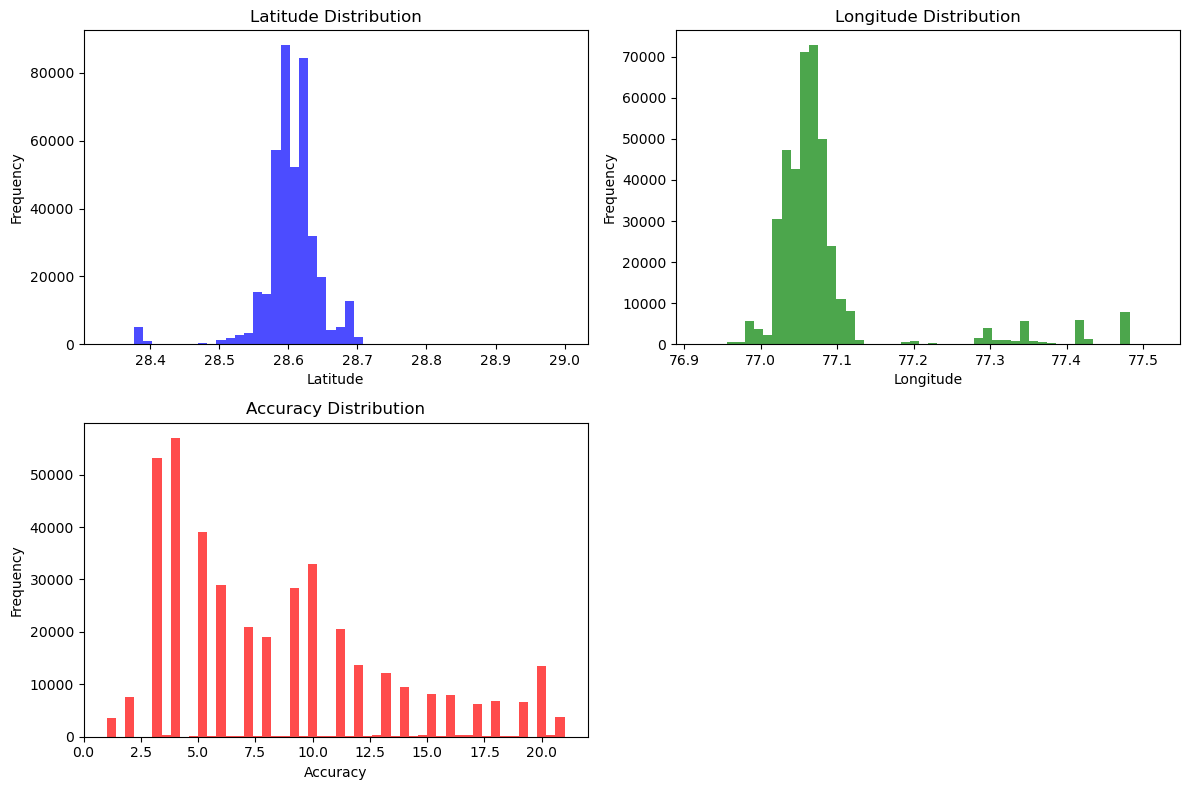

(                           date_time       latitude      longitude  \
 count                         403557  403557.000000  403557.000000   
 mean   2023-07-11 12:24:56.642816256      28.604259      77.083881   
 min              2023-01-01 03:40:35      28.337009      76.919319   
 25%              2023-07-15 15:47:38      28.588490      77.040901   
 50%              2023-07-21 13:46:42      28.605003      77.062340   
 75%              2023-07-27 15:25:25      28.624559      77.080536   
 max              2023-07-31 22:29:24      28.999989      77.518150   
 std                              NaN       0.041625       0.092409   
 
             accuracy  prev_latitude  prev_longitude     time_diff  \
 count  403557.000000  403556.000000   403556.000000  4.035560e+05   
 mean        8.285021      28.604259       77.083881  4.534223e+01   
 min         1.000000      28.337009       76.919319  0.000000e+00   
 25%         4.000000      28.588490       77.040901  0.000000e+00   
 50%     

In [22]:
# Basic summary statistics
data_description = gps_data.describe()

# Check for missing values
missing_values = gps_data.isnull().sum()

# Plot distributions of key variables
plt.figure(figsize=(12, 8))

# Latitude and Longitude distributions
plt.subplot(2, 2, 1)
plt.hist(gps_data['latitude'], bins=50, color='blue', alpha=0.7)
plt.title('Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(gps_data['longitude'], bins=50, color='green', alpha=0.7)
plt.title('Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

# Accuracy distribution
plt.subplot(2, 2, 3)
plt.hist(gps_data['accuracy'], bins=50, color='red', alpha=0.7)
plt.title('Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Show the summary statistics and missing values
data_description, missing_values


## GPS Data: Latitude and Longitude Over Time

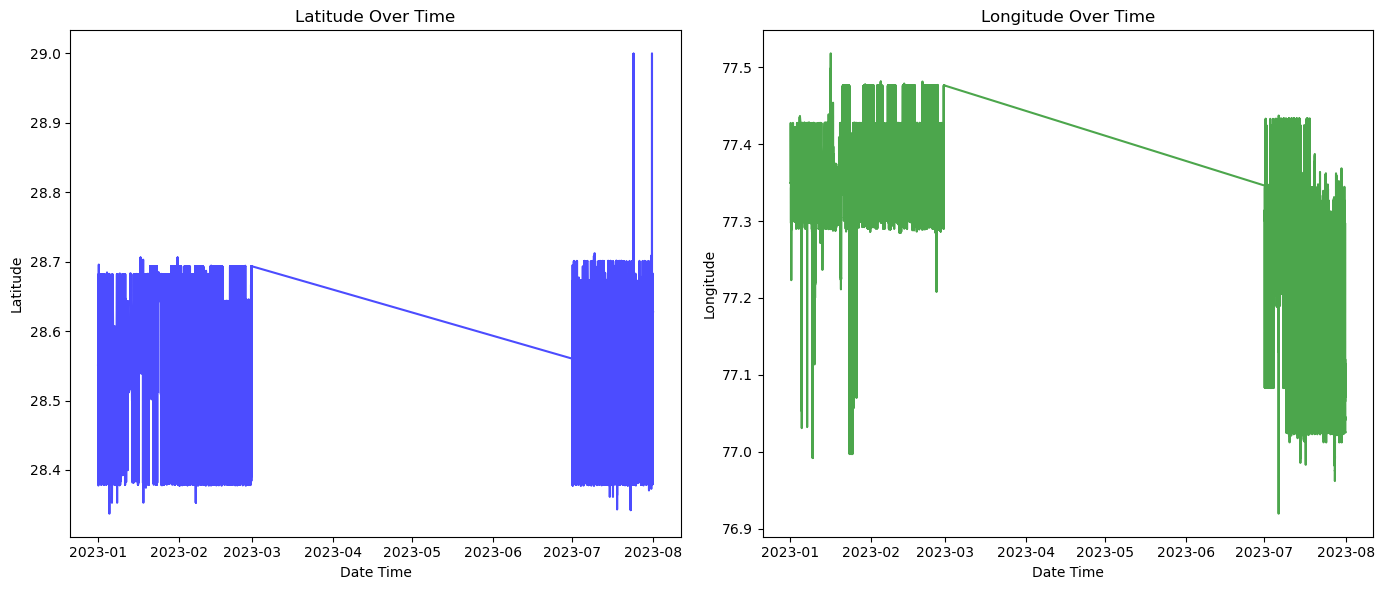

In [23]:
# Plotting the time series of latitude and longitude
plt.figure(figsize=(14, 6))

# Plot Latitude over Time
plt.subplot(1, 2, 1)
plt.plot(gps_data['date_time'], gps_data['latitude'], color='blue', alpha=0.7)
plt.title('Latitude Over Time')
plt.xlabel('Date Time')
plt.ylabel('Latitude')

# Plot Longitude over Time
plt.subplot(1, 2, 2)
plt.plot(gps_data['date_time'], gps_data['longitude'], color='green', alpha=0.7)
plt.title('Longitude Over Time')
plt.xlabel('Date Time')
plt.ylabel('Longitude')

plt.tight_layout()
plt.show()


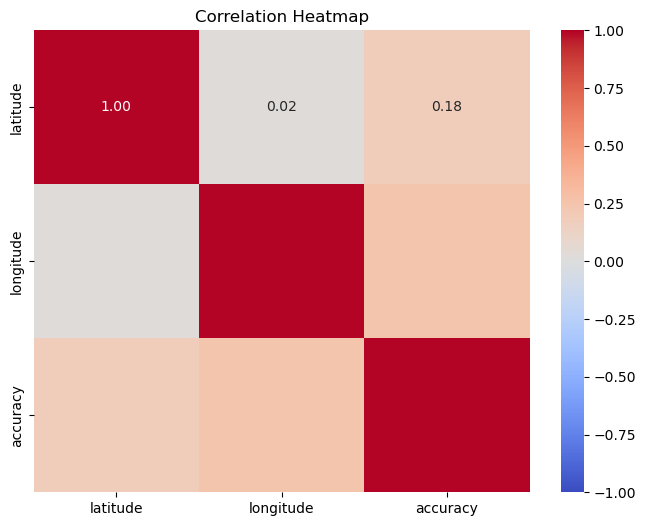

In [24]:
import seaborn as sns

# Select relevant columns for correlation
correlation_data = gps_data[['latitude', 'longitude', 'accuracy']].dropna()

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


##  Mapping GPS Points with Folium(IF DOEST LOAD IN JUPYTER NOTEBOOK VIEW DIRECTLY BY OPENING HTML FILE)


##  This project successfully demonstrated the ability to analyze large mobility datasets, identify trips and dwells, and integrate external geographic data to enhance the analysis. The combination of GPS data with building location data provides valuable insights into the movement behavior, allowing for a deeper understanding of mobility patterns in the given area. This type of analysis can be leveraged for practical use cases like route optimization, urban planning, and real-time tracking in transportation and logistics industries.
